# **Importing libraries**

In [ ]:
import pandas as pd 
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **Extracting Data**

In [ ]:
df = pd.read_csv('Data/LinkedInJobs_MLDataset.csv')
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


# **Meta Data**

**LinkedInJobs_MLDataset Data Dictionary**

- Co_Nm / Company Name, dType Object
- Co_Pg_Lstd / Company Page Listed, dType Bool
- Emp_Cnt / Company Employee Count, dType int64
- Flw_Cnt / Company Follower Count, dType int64
- Job_Ttl / Job Title, dType Object
- Job_Desc / Job Description, dtype Object
- Is_Supvsr / Is Post a Supervisor Position (Calculated), dType Bool
- max_sal / Maximum Salary, dtype Float64
- med_sal / Median Salary, dtype Float64
- min_sal / Minimum Salary, dtype Float64
- py_prd / Pay Period, dtype Category {Not Listed, YEARLY, HOURLY, MONTHLY, Unpaid, WEEKLY, ONCE}
- py_lstd / Pay Listed (Calculated), dtype Bool 
- wrk_typ / Work Type, dtype Category {Full-time, Contract, Part-time, Temporary, Internship, Other, Volunteer}
- loc / Job Location, dtype Object
- st_code / Job State Code (Calculated), dtype Object
- is_remote / Is Job Remote (Calculated), dtype Bool
- views / Number of Posting Views, dtype int64
- app_typ / Application Type, dtype Category {Offsite Apply, SimpleOnSiteApply, ComplexOnSiteApply}
- app_is_off / Is Application Offsite (Calculated), dtype Bool
- xp_lvl / Experience Level, dtype Category {Mid-Senior level, Not Listed, Entry level, Associate, Director, Internship, Executive}
- domain / Posting Domain, dtype Object
- has_post_domain / Has Posting Domain (Calculated), dtype Bool
- is_sponsored / Is Sponsored, dtype Bool
- base_comp / Has Base Compensation, dtype Bool


## ***33246 Rows & 24 column  (Target -> *maximum_salary*)***

In [ ]:
len(df)

33246

# **EDA**

#### **Rename Columns**

In [ ]:
columns_renamed = [
    "company_name",
    "company_page_listed",
    "company_employee_count",
    "company_follower_count",
    "job_title",
    "job_description",
    "is_post_a_supervisor_position_calculated",
    "maximum_salary",
    "median_salary",
    "minimum_salary",
    "pay_period",
    "pay_listed_calculated",
    "work_type",
    "job_location",
    "job_state_code_calculated",
    "is_job_remote_calculated",
    "number_of_posting_views",
    "application_type",
    "is_application_offsite_calculated",
    "experience_level",
    "posting_domain",
    "has_posting_domain_calculated",
    "is_sponsored",
    "has_base_compensation"
]


In [ ]:
df.columns

Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', 'views', 'app_typ',
       'app_is_off', 'xp_lvl', 'domain', 'has_post_domain', 'is_sponsored',
       'base_comp'],
      dtype='object')

In [ ]:
df.columns = columns_renamed
df.head()

,company_name,company_page_listed,company_employee_count,company_follower_count,job_title,job_description,is_post_a_supervisor_position_calculated,maximum_salary,median_salary,minimum_salary,...,job_state_code_calculated,is_job_remote_calculated,number_of_posting_views,application_type,is_application_offsite_calculated,experience_level,posting_domain,has_posting_domain_calculated,is_sponsored,has_base_compensation
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   company_name                              33242 non-null  object 
 1   company_page_listed                       33246 non-null  bool   
 2   company_employee_count                    33246 non-null  int64  
 3   company_follower_count                    33246 non-null  int64  
 4   job_title                                 33246 non-null  object 
 5   job_description                           33244 non-null  object 
 6   is_post_a_supervisor_position_calculated  33246 non-null  bool   
 7   maximum_salary                            33246 non-null  float64
 8   median_salary                             33246 non-null  float64
 9   minimum_salary                            33246 non-null  float64
 10  pay_period                        

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
company_employee_count,33246.0,15484.558744,6.218095e+04,0.0,148.00,1235.0,8160.0000,829111.0
company_follower_count,33246.0,523436.391055,2.708736e+06,0.0,8135.75,37996.5,168036.0000,31887198.0
maximum_salary,33246.0,31866.146792,6.823853e+04,0.0,0.00,0.0,97.9675,1300000.0
median_salary,33246.0,27494.954904,5.790564e+04,0.0,0.00,0.0,90.0000,1050000.0
minimum_salary,33246.0,23123.763015,4.897738e+04,0.0,0.00,0.0,84.7850,998426.0
is_job_remote_calculated,33246.0,0.144438,3.515390e-01,0.0,0.00,0.0,0.0000,1.0
number_of_posting_views,33246.0,45.424592,1.269727e+02,0.0,1.00,7.0,38.0000,5656.0
is_sponsored,33246.0,0.244150,4.295884e-01,0.0,0.00,0.0,0.0000,1.0
has_base_compensation,33246.0,0.401612,4.902317e-01,0.0,0.00,0.0,1.0000,1.0


In [ ]:
df.describe(include=['O' , 'category'])

,company_name,job_title,job_description,pay_period,work_type,job_location,job_state_code_calculated,application_type,experience_level,posting_domain
count,33242,33246,33244,33246,33246,33246,33246,33246,33246,19688
unique,11267,22290,30139,7,7,4621,53,3,7,2576
top,No Company Page,Sales Director [Owner/Operator],The Entrepreneur we seek is an experienced sal...,Not Listed,Full-time,United States,XF,OffsiteApply,Mid-Senior level,www.click2apply.net
freq,701,120,78,19684,26900,2341,5529,20104,11258,533


In [ ]:
# check null values
df.isnull().sum()

company_name                                    4
company_page_listed                             0
company_employee_count                          0
company_follower_count                          0
job_title                                       0
job_description                                 2
is_post_a_supervisor_position_calculated        0
maximum_salary                                  0
median_salary                                   0
minimum_salary                                  0
pay_period                                      0
pay_listed_calculated                           0
work_type                                       0
job_location                                    0
job_state_code_calculated                       0
is_job_remote_calculated                        0
number_of_posting_views                         0
application_type                                0
is_application_offsite_calculated               0
experience_level                                0


In [ ]:
for i in df.columns :

    print(df[i].value_counts().head(10))
    print("=============================================================")

company_name
No Company Page            701
Insight Global             217
City Lifestyle             198
Aya Healthcare             191
CareerStaff Unlimited      186
Verizon                    154
Vivian Health              143
Cogent Communications      131
Jobot                      125
Fusion Medical Staffing    124
Name: count, dtype: int64
company_page_listed
True     32545
False      701
Name: count, dtype: int64
company_employee_count
0        854
4        224
13096    217
347      213
2        200
983      197
18302    191
1        180
3        159
352      156
Name: count, dtype: int64
company_follower_count
0          717
1711262    217
28450      198
90008      191
71267      186
1384923    154
21756      144
92719      131
16269      125
1967080    125
Name: count, dtype: int64
job_title
Sales Director [Owner/Operator]    120
Sales Manager                       99
Project Manager                     98
Customer Service Representative     85
Retail Sales Associate         

In [ ]:
#check unique values
for i in df.columns :

    print(df[i].value_counts().tail(10))
    print("=============================================================")

company_name
TIDAL                            1
Keller Williams Laguna Niguel    1
MIT Lincoln Laboratory           1
ResMed                           1
GAF                              1
ISN                              1
Textron Systems                  1
BeiGene                          1
Gretel.ai                        1
AERZEN USA                       1
Name: count, dtype: int64
company_page_listed
True     32545
False      701
Name: count, dtype: int64
company_employee_count
153003    1
5842      1
2639      1
111798    1
4404      1
1458      1
22255     1
3424      1
1152      1
3773      1
Name: count, dtype: int64
company_follower_count
32108     1
13098     1
66035     1
160444    1
45727     1
95515     1
5926      1
4915      1
515005    1
430       1
Name: count, dtype: int64
job_title
Tower Technician II                                               1
Pick Pack Technician                                              1
Social Work Associate                              

### *Data types*

Text(0.5, 1.0, 'Data Types')

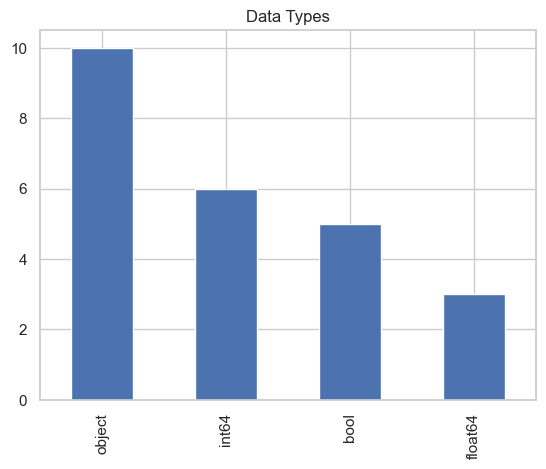

In [ ]:
df.dtypes.value_counts().plot(kind='bar')
plt.title('Data Types')

### *Grouping*

In [ ]:
top_companies = (
    df.groupby('company_name', as_index=False)['maximum_salary']
      .mean()
)
top_companies['maximum_salary'] = top_companies['maximum_salary'].astype('int')
top_companies.sort_values('maximum_salary', ascending=False).head(10)

,company_name,maximum_salary
9691,The Dedham Group,900000
10212,UP Talent Group,800000
4069,Goliath Partners,766666
1114,Bakers Floor & Surface,710000
9094,Stanley House Consulting,650000
4816,Imagen Technologies,600000
9029,Spotter,500000
2260,Colburn Financial,500000
9596,Tenstorrent Inc.,500000
6885,Nuvance Health,500000


In [ ]:
df.groupby('job_title',as_index=False)['maximum_salary'].mean().sort_values('maximum_salary',ascending=False).head(10)

,job_title,maximum_salary
14807,Quantitative Developer,1300000.0
7326,Fintech Startup | Tech Lead Manager - Software...,1100000.0
20324,Tech Lead Manager (L6-L8) | Disruptive FinTech,1000000.0
4493,Criminal Court Clerk,998426.0
10266,Life Science Consulting Partner,900000.0
8346,Head of Sales & Marketing (Healthcare),800000.0
5839,"Distinguished Engineer, Trilogy (Remote) - $80...",800000.0
3341,"Chief Software Architect, Trilogy (Remote) - $...",800000.0
21465,Urologist,800000.0
15608,Registered Nurse or Licensed Practical Nurse -...,785358.0


## *Univariate*

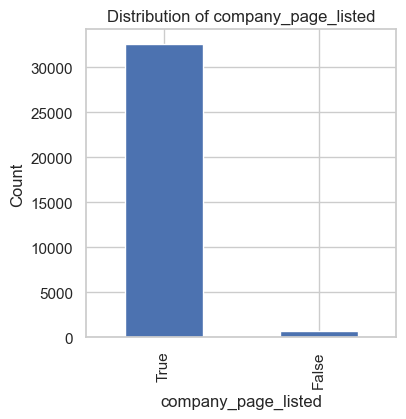

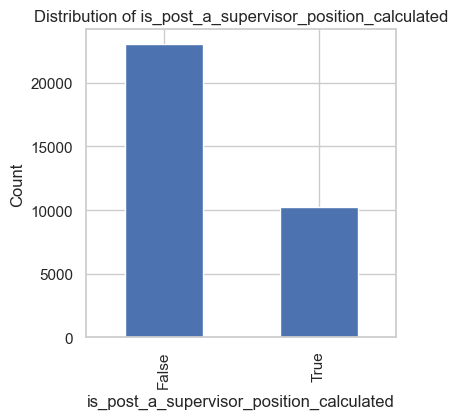

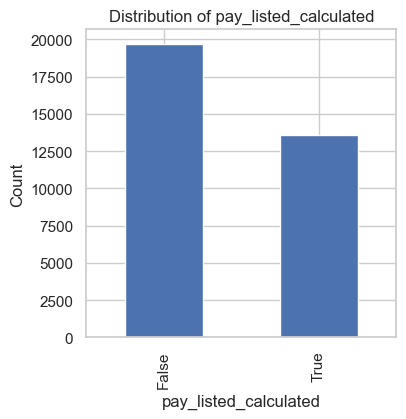

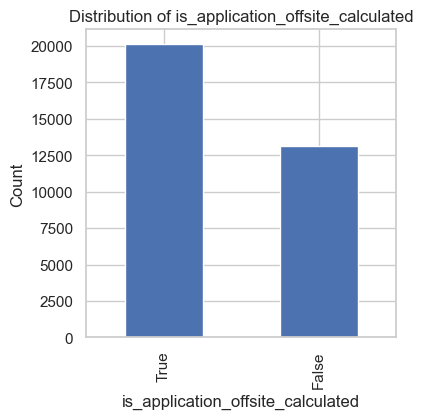

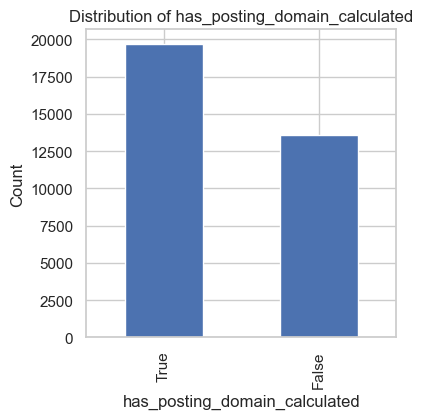

In [ ]:

df_bool = df.select_dtypes(include=['bool'])
for col in df_bool.columns:
    df[col].value_counts().plot(kind='bar',figsize=(4,4))
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

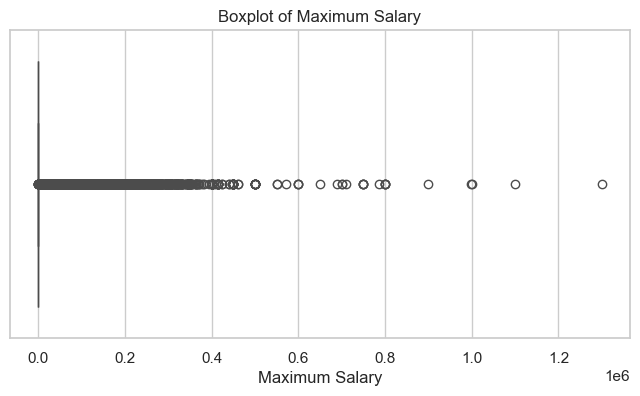

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.boxplot(x=df['maximum_salary'])
plt.title("Boxplot of Maximum Salary")
plt.xlabel("Maximum Salary")
plt.show()


<Axes: xlabel='experience_level'>

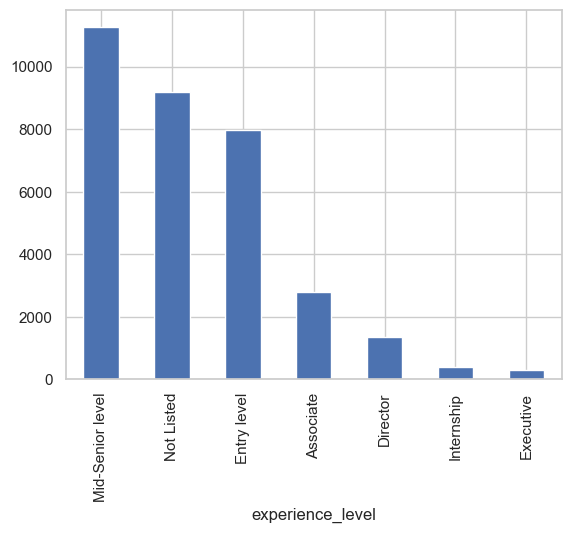

In [ ]:
df['experience_level'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

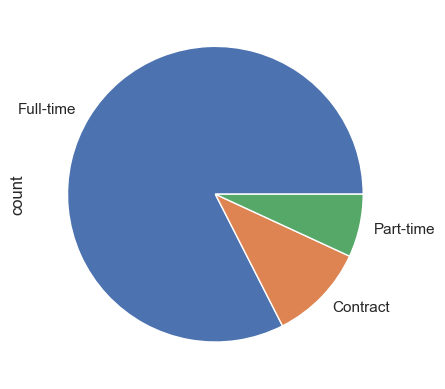

In [ ]:
df['work_type'].value_counts().head(3).plot(kind='pie')

# Bivariate

<Axes: xlabel='number_of_posting_views', ylabel='maximum_salary'>

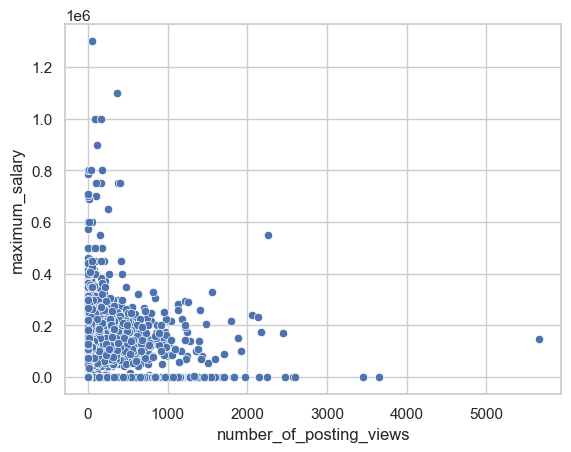

In [ ]:
sns.scatterplot(df,x='number_of_posting_views',y='maximum_salary')

In [ ]:
df['company_follower_count'] = df['company_follower_count'].astype('int')
df['maximum_salary'] = df['maximum_salary'].astype('int')
sns.lineplot(df,x='company_follower_count',y='maximum_salary')

Text(0.5, 1.0, 'application_type')

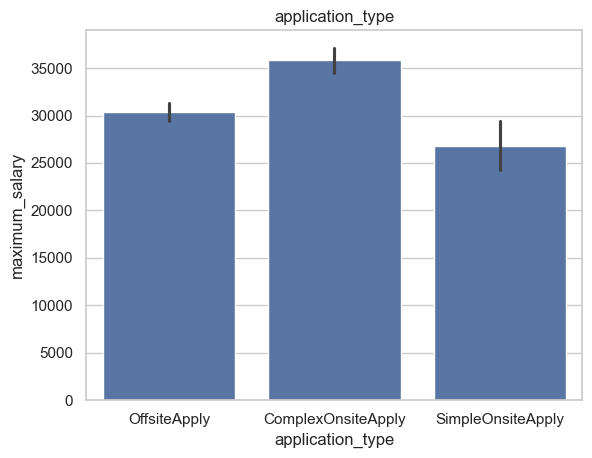

In [ ]:
sns.barplot(x=df['application_type'],y=df['maximum_salary'])
plt.title("application_type")

Text(0.5, 1.0, 'pay_period')

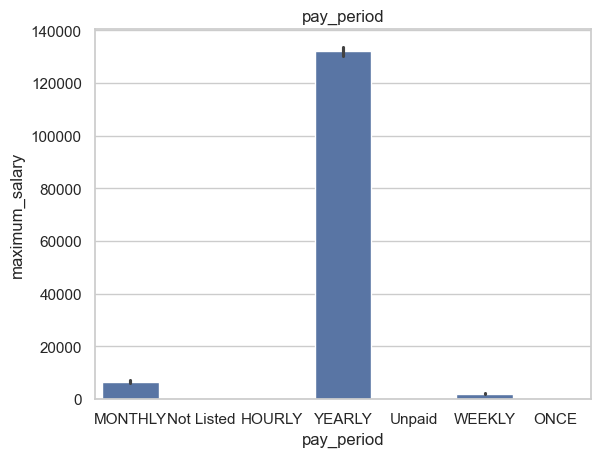

In [ ]:
sns.barplot(x=df['pay_period'],y=df['maximum_salary'])
plt.title("pay_period")


In [ ]:
titles= df['job_title'].str.split(' ',expand=True)
for i in titles.columns :
    print(titles[i].value_counts())
    print("=============================================================")

0
Senior                  1989
Sales                    837
Registered               486
Assistant                482
Travel                   442
                        ... 
LMHC                       1
Adjuster                   1
Sports-Entertainment       1
Associate/Sr.              1
Letdown                    1
Name: count, Length: 3801, dtype: int64
1
Manager               1657
Engineer              1024
Sales                  789
-                      621
Assistant              601
                      ... 
Character                1
Technician/Driver        1
Paralegal/Legal          1
Developer/Platform       1
all                      1
Name: count, Length: 3305, dtype: int64
2
-             1972
Manager       1767
Engineer      1069
Specialist     730
Analyst        527
              ... 
Event***         1
(Major           1
star             1
[5048]           1
(LLM             1
Name: count, Length: 3513, dtype: int64
3
-                 2083
Manager            543
E

# **Categorize job title column**

In [ ]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['job_title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())


['Other' 'Engineering' 'Architect' 'Management' 'Technician'
 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist' 'Developer'
 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [ ]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)


Categorized_Job_Title
Other             12439
Management         5116
Engineering        3262
Specialist         1740
Analyst            1528
Technician         1265
Assistant          1158
Sales              1140
Nursing            1122
Coordinator         732
Representative      727
Developer           688
Supervisor          521
Consultant          478
Architect           387
Designer            314
Administrator       299
Research            171
Technologist        159
Name: count, dtype: int64


In [ ]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_job_Title'] = df['job_title'].apply(categorize_job_title)

# Check the unique values in the new column
print(df['Categorized_job_Title'].unique())


['Reduced_Other' 'Other' 'Engineering' 'Architect' 'Management'
 'Technician' 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist'
 'Developer' 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [ ]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)

Categorized_Job_Title
Other             12439
Management         5116
Engineering        3262
Specialist         1740
Analyst            1528
Technician         1265
Assistant          1158
Sales              1140
Nursing            1122
Coordinator         732
Representative      727
Developer           688
Supervisor          521
Consultant          478
Architect           387
Designer            314
Administrator       299
Research            171
Technologist        159
Name: count, dtype: int64


In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Function to extract and count words in job titles
def count_words_in_category(category):
    words = ' '.join(df[df['Categorized_Job_Title'] == category]['job_title']).lower().split()
    word_counts = Counter(words)
    return word_counts

# Get word counts for "Other" category
other_word_counts = count_words_in_category('Other')
print("Word counts in 'Other' category:")
print(other_word_counts.most_common(50))  # Adjust the number as needed

print("\n-----------------------------\n")

# Get word counts for "Reduced_Other" category
reduced_other_word_counts = count_words_in_category('Reduced_Other')
print("Word counts in 'Reduced_Other' category:")
print(reduced_other_word_counts.most_common(50))  # Adjust the number as needed

Word counts in 'Other' category:
[('-', 3168), ('associate', 960), ('director', 784), ('senior', 671), ('of', 573), ('accountant', 430), ('lead', 395), ('rn', 394), ('&', 378), ('and', 343), ('executive', 307), ('operator', 283), ('director,', 282), ('in', 276), ('tech', 273), ('time', 262), ('staff', 253), ('account', 251), ('shift', 250), ('driver', 242), ('service', 239), ('operations', 226), ('business', 218), ('attorney', 209), ('tax', 205), ('officer', 202), ('advisor', 202), ('team', 200), ('intern', 200), ('therapist', 198), ('support', 193), ('data', 190), ('health', 189), ('i', 186), ('management', 167), ('development', 166), ('warehouse', 165), ('care', 159), ('services', 159), ('clerk', 153), ('remote', 151), ('/', 151), ('job', 148), ('part', 146), ('ii', 146), ('make', 146), ('marketing', 145), ('medical', 144), ('scientist', 144), ('to', 143)]

-----------------------------

Word counts in 'Reduced_Other' category:
[]


In [ ]:
# Define a function to recategorize job titles
def recategorize_job_title(title):
    title_lower = title.lower()  # Convert to lowercase for case-insensitive matching

    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    elif 'receptionist' in title_lower:
        return 'Other' if 'analyst' in title_lower else 'Assistant'
    elif 'customer service' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Sales'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'accountant' in title_lower:
        return 'Reduced_Other' if 'senior' in title_lower else 'Accounting'
    elif 'senior' in title_lower:
        return 'Other' if 'director' in title_lower else 'Senior'
    elif 'director' in title_lower:
        return 'Other' if 'executive' in title_lower else 'Director'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'lead' in title_lower:
        return 'Reduced_Other' if 'rn' in title_lower else 'Lead'
    elif 'rn' in title_lower:
        return 'Reduced_Other' if 'operator' in title_lower else 'Nursing'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'attorney' in title_lower:
        return 'Reduced_Other' if 'account' in title_lower else 'Legal'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Accounting'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'of' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Other'
    elif 'tech' in title_lower:
        return 'Other' if 'director' in title_lower else 'Technical'
    elif 'business' in title_lower:
        return 'Other' if 'director' in title_lower else 'Business'
    elif 'service' in title_lower:
        return 'Other' if 'director' in title_lower else 'Service'
    elif 'operations' in title_lower:
        return 'Other' if 'director' in title_lower else 'Operations'
    elif 'driver' in title_lower:
        return 'Other' if 'director' in title_lower else 'Driver'
    elif 'tax' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Tax'
    elif 'support' in title_lower:
        return 'Other' if 'director' in title_lower else 'Support'
    elif 'job' in title_lower:
        return 'Other' if 'director' in title_lower else 'Job'
    elif 'make' in title_lower:
        return 'Other' if 'director' in title_lower else 'Make'
    elif 'to' in title_lower:
        return 'Other' if 'director' in title_lower else 'To'
    elif 'health' in title_lower:
        return 'Other' if 'director' in title_lower else 'Health'
    elif '/' in title_lower:
        return 'Other' if 'director' in title_lower else 'Slash'
    elif 'remote' in title_lower:
        return 'Other' if 'director' in title_lower else 'Remote'
    elif 'care' in title_lower:
        return 'Other' if 'director' in title_lower else 'Care'
    elif 'travel' in title_lower:
        return 'Other' if 'director' in title_lower else 'Travel'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'part' in title_lower:
        return 'Other' if 'director' in title_lower else 'Part'
    elif 'team' in title_lower:
        return 'Other' if 'director' in title_lower else 'Team'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'management' in title_lower:
        return 'Other' if 'director' in title_lower else 'Management'
    elif 'intern' in title_lower:
        return 'Other' if 'director' in title_lower else 'Intern'
    elif 'services' in title_lower:
        return 'Other' if 'director' in title_lower else 'Services'
    elif 'staff' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Staff'
    elif 'development' in title_lower:
        return 'Other' if 'director' in title_lower else 'Development'
    elif 'center' in title_lower:
        return 'Other' if 'director' in title_lower else 'Center'
    elif '2024' in title_lower:
        return 'Other' if 'director' in title_lower else '2024'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Account'
    elif 'data' in title_lower:
        return 'Other' if 'director' in title_lower else 'Data'
    elif 'i' in title_lower:
        return 'Other' if 'director' in title_lower else 'I'
    elif 'full' in title_lower:
        return 'Other' if 'director' in title_lower else 'Full'
    elif 'advisor' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Advisor'
    elif 'professional' in title_lower:
        return 'Other' if 'director' in title_lower else 'Professional'
    elif 'medical' in title_lower:
        return 'Other' if 'director' in title_lower else 'Medical'
    elif 'vice' in title_lower:
        return 'Other' if 'director' in title_lower else 'Vice'
    elif '|' in title_lower:
        return 'Other' if 'director' in title_lower else 'Pipe'
    elif 'ii' in title_lower:
        return 'Other' if 'director' in title_lower else 'II'
    elif 'customer' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Customer'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with recategorized job titles
df['Recategorized_Job_Title'] = df['job_title'].apply(recategorize_job_title)

# Check the unique values in the new column
print(df['Recategorized_Job_Title'].unique())


['Care' 'Sales' 'Engineering' 'Reduced_Other' 'Architect' 'Management'
 'Director' 'Technician' 'Technical' 'I' 'Representative' 'Designer'
 'Analyst' 'Nursing' 'Remote' 'Other' 'To' 'Specialist' 'Developer'
 'Supervisor' 'Coordinator' 'Driver' 'Lead' 'Slash' 'Operator' 'Assistant'
 'Staff' 'Consultant' 'Part' 'Senior' 'Administrator' 'Research' 'Support'
 'Accounting' 'Tax' 'Technologist' 'Health' '2024' 'Service' 'Executive'
 'Center' 'Team' 'Data' 'Operations' 'Business' 'Development' 'Job'
 'Travel' 'Pipe' 'Make' 'Full']


['Healthcare' 'Sales' 'Engineering' 'Other' 'Management' 'Technical'
 'Creative' 'Analyst' 'Specialist' 'Assistant' 'Financial']
Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


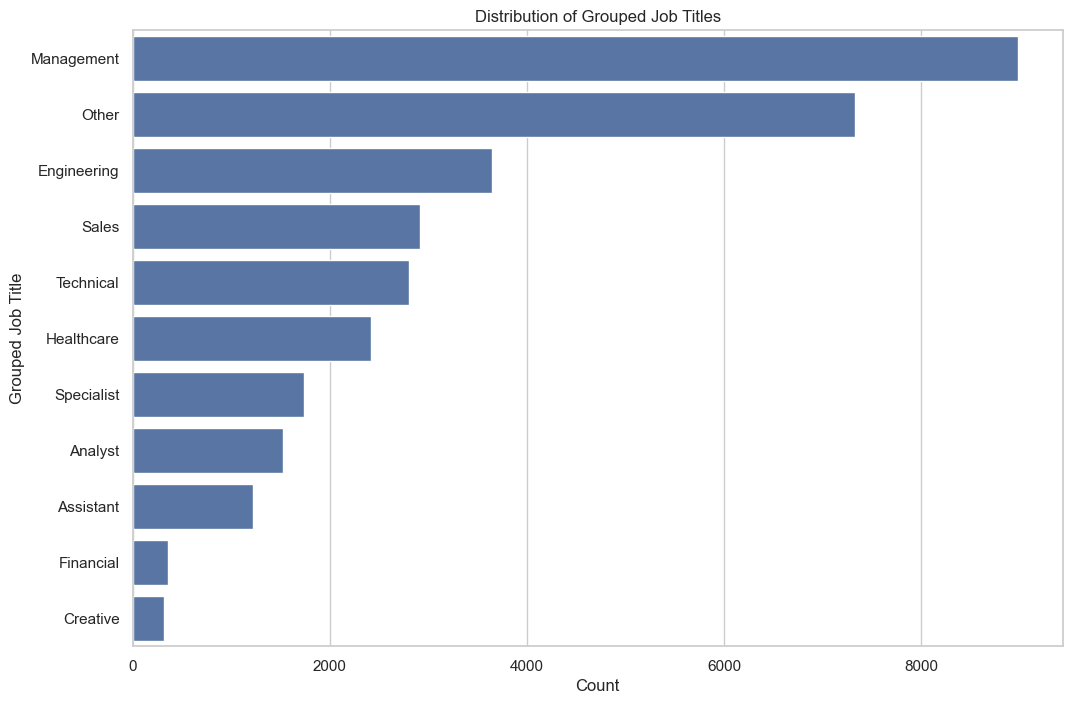

In [ ]:
# Define a mapping for grouping categories
category_mapping = {
    'Management': 'Management',
    'Engineering': 'Engineering',
    'I': 'Other',
    'Nursing': 'Healthcare',
    'Sales': 'Sales',
    'Specialist': 'Specialist',
    'Analyst': 'Analyst',
    'Technician': 'Technical',
    'Assistant': 'Assistant',
    'Reduced_Other': 'Other',
    'Director': 'Management',
    'To': 'Other',
    'Other': 'Other',
    'Coordinator': 'Management',
    'Representative': 'Sales',
    'Developer': 'Technical',
    'Supervisor': 'Management',
    'Lead': 'Management',
    'Consultant': 'Management',
    'Architect': 'Engineering',
    'Senior': 'Other',
    'Slash': 'Other',
    'Accounting': 'Financial',
    'Technical': 'Technical',
    'Designer': 'Creative',
    'Administrator': 'Management',
    'Operator': 'Technical',
    'Executive': 'Management',
    'Driver': 'Other',
    'Part': 'Other',
    'Research': 'Other',
    'Service': 'Other',
    'Technologist': 'Technical',
    'Health': 'Healthcare',
    'Support': 'Other',
    'Care': 'Healthcare',
    'Staff': 'Other',
    'Team': 'Management',
    'Business': 'Other',
    'Data': 'Technical',
    'Remote': 'Other',
    'Job': 'Other',
    'Operations': 'Management',
    'Travel': 'Other',
    'Center': 'Management',
    '2024': 'Other',
    'Tax': 'Financial',
    'Make': 'Other',
    'Development': 'Other',
    'Full': 'Other',
    'Pipe': 'Other'
}

# Map the categories using the defined mapping
df['Grouped_Category'] = df['Recategorized_Job_Title'].map(category_mapping)

# Check the unique values in the new column
print(df['Grouped_Category'].unique())

# Print the count values of grouped categories
grouped_category_counts = df['Grouped_Category'].value_counts()
print(grouped_category_counts)

# Set the plot style
sns.set(style="whitegrid")

# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Grouped_Category', data=df, order=df['Grouped_Category'].value_counts().index)
plt.title('Distribution of Grouped Job Titles')
plt.xlabel('Count')
plt.ylabel('Grouped Job Title')
plt.show()


In [ ]:
# Print the count values of all categories
category_counts_recategorized = df['Grouped_Category'].value_counts()
print(category_counts_recategorized)

Grouped_Category
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: count, dtype: int64


# **RECATEGORIZING THE LOCATION VARIABLE**

In [ ]:
#check current column
df[['job_location']].value_counts()

job_location 
United States    2341
New York, NY      818
Chicago, IL       534
Houston, TX       444
Dallas, TX        383
                 ... 
Zellwood, FL        1
Zachary, LA         1
Abbeville, SC       1
Yukon, OK           1
Yucaipa, CA         1
Name: count, Length: 4621, dtype: int64

In [ ]:
df[['job_location']]

,job_location
0,"Little River, SC"
1,"Beaver Dam, WI"
2,"Bessemer, AL"
3,"Aliso Viejo, CA"
4,United States
...,...
33241,"Boston, MA"
33242,"Greenville, SC"
33243,"Los Angeles, CA"
33244,"Aurora, Colorado, United States"


In [ ]:
#split column 
splitted_loc=df['job_location'].str.strip().str.split(',',expand=True)
splitted_loc

,0,1,2
0,Little River,SC,None
1,Beaver Dam,WI,None
2,Bessemer,AL,None
3,Aliso Viejo,CA,None
4,United States,None,None
...,...,...,...
33241,Boston,MA,None
33242,Greenville,SC,None
33243,Los Angeles,CA,None
33244,Aurora,Colorado,United States


In [ ]:
#unique vlues
for i in splitted_loc.columns :
    print(splitted_loc[i].value_counts())
    print("##########################################")
    print(len(splitted_loc[i]))

0
United States              2341
New York                   1004
Chicago                     535
Houston                     446
Austin                      429
                           ... 
Boise Metropolitan Area       1
Forked River                  1
Riverside County              1
Milwaukee County              1
Chatham County                1
Name: count, Length: 3783, dtype: int64
##########################################
33246
1
CA                3740
TX                2617
FL                1684
NY                1603
IL                1234
                  ... 
Minnesota Area       1
Illinois Area        1
AR Area              1
Wisconsin            1
Louisiana            1
Name: count, Length: 97, dtype: int64
##########################################
33246
2
United States     138
United Kingdom      1
Name: count, dtype: int64
##########################################
33246


In [ ]:
#categorize most freq loc
ls = []
lest =[]
for i in splitted_loc.columns:
    top_values = splitted_loc[i].value_counts().head(5).index.tolist()
    ls.append(top_values)

for i in ls:
    for j in i:
        lest.append(j.lower().strip())
print(lest)

['united states', 'new york', 'chicago', 'houston', 'austin', 'ca', 'tx', 'fl', 'ny', 'il', 'united states', 'united kingdom']


In [ ]:
#function to loop over df and categorize loc
def job(job_column, lst):
    # Make a copy to avoid modifying the original
    df = job_column.copy()

    # Create a new column
    df['job_location_Categorized'] = None

    for index, val in df['job_location'].astype(str).items():
        found = False
        for word in lst:
            if word.lower() in val.lower():
                df.loc[index, 'job_location_Categorized'] = word
                found = True
                break
        if not found:
            df.loc[index, 'job_location_Categorized'] = 'Unknown'
    return df


In [ ]:
#apply function
df = job(df,lest)

In [ ]:
#unique after modified
df[['job_location_Categorized']].value_counts()

job_location_Categorized
Unknown                     15605
ca                           4352
united states                3702
il                           2668
tx                           1792
fl                           1682
new york                     1113
ny                            822
chicago                       588
houston                       489
austin                        432
united kingdom                  1
Name: count, dtype: int64

In [ ]:
df.head()

,company_name,company_page_listed,company_employee_count,company_follower_count,job_title,job_description,is_post_a_supervisor_position_calculated,maximum_salary,median_salary,minimum_salary,...,experience_level,posting_domain,has_posting_domain_calculated,is_sponsored,has_base_compensation,Categorized_Job_Title,Categorized_job_Title,Recategorized_Job_Title,Grouped_Category,job_location_Categorized
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250,5250.00,5250.00,...,Entry level,careers-demant.icims.com,True,0,1,Other,Reduced_Other,Care,Healthcare,Unknown
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0,0.00,0.00,...,Not Listed,www.click2apply.net,True,0,0,Other,Other,Sales,Sales,Unknown
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0,0.00,0.00,...,Not Listed,www.click2apply.net,True,0,0,Engineering,Engineering,Engineering,Engineering,Unknown
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22,22.27,22.27,...,Entry level,jobs.apploi.com,True,0,1,Other,Reduced_Other,Reduced_Other,Other,ca
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834,240895.00,205956.00,...,Mid-Senior level,careers.iherb.com,True,0,1,Architect,Architect,Architect,Engineering,united states


# **VISUALIZATION**

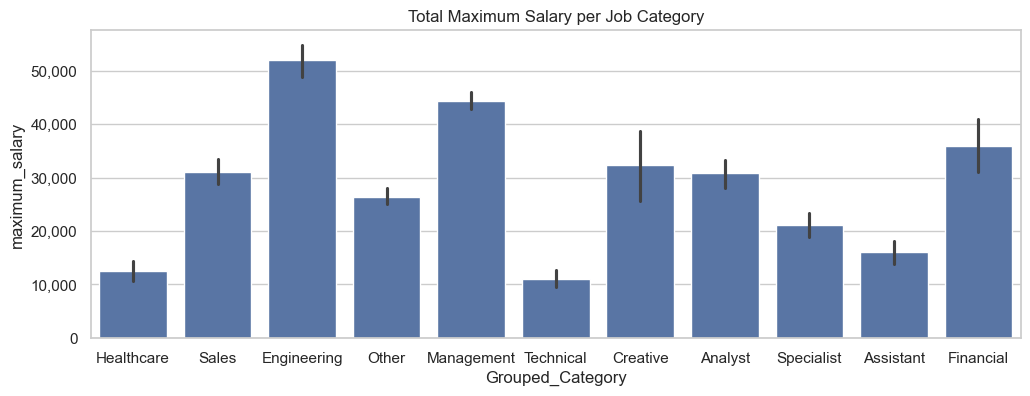

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig,ax =plt.subplots(figsize=(12,4))
sns.barplot(x='Grouped_Category', y='maximum_salary', data=df)
plt.title('Total Maximum Salary per Job Category')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()


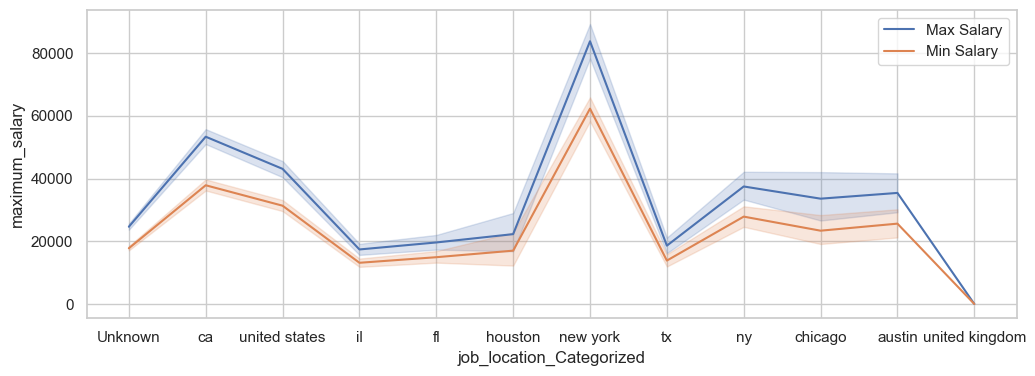

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=df, x='job_location_Categorized', y='maximum_salary', label='Max Salary', ax=ax)
sns.lineplot(data=df, x='job_location_Categorized', y='minimum_salary', label='Min Salary', ax=ax)
ax.legend()
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(data=df,x='company_follower_count',y='number_of_posting_views',c='r')
plt.title("Followers and Views")

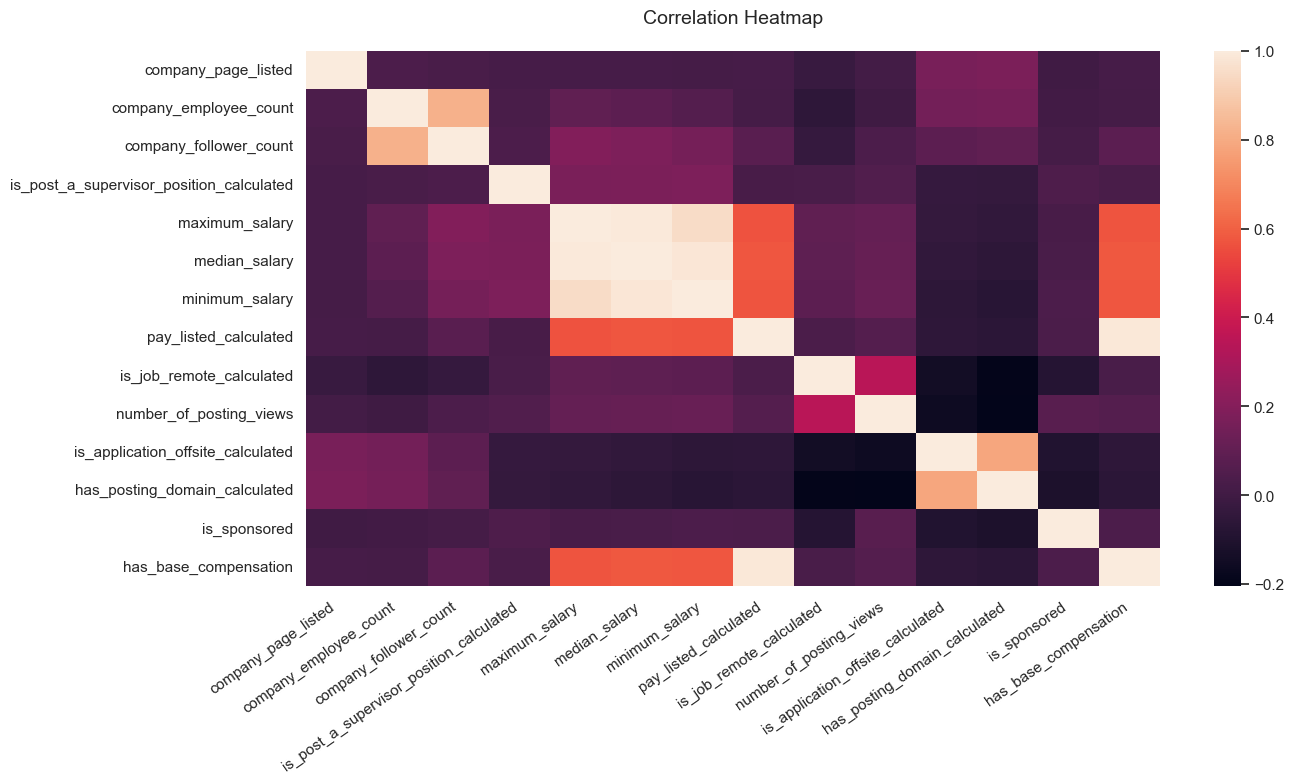

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))  

ax = sns.heatmap(df.corr(numeric_only=True),
                 annot_kws={'size':10})


plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)


plt.title('Correlation Heatmap', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


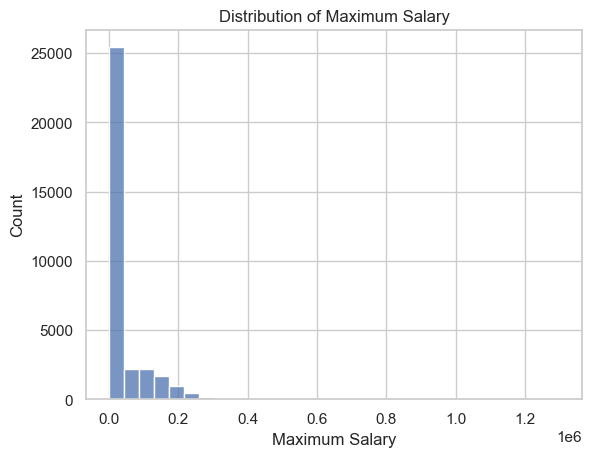

In [ ]:
sns.histplot(df['maximum_salary'], bins=30, kde=False)
plt.xlabel('Maximum Salary')
plt.ylabel('Count')
plt.title('Distribution of Maximum Salary')
plt.show()


# *Remove Outliers*


Q1: 0.0, Q3: 97.75, IQR: 97.75
Lower bound for outliers: -146.625
Upper bound for outliers: 244.375


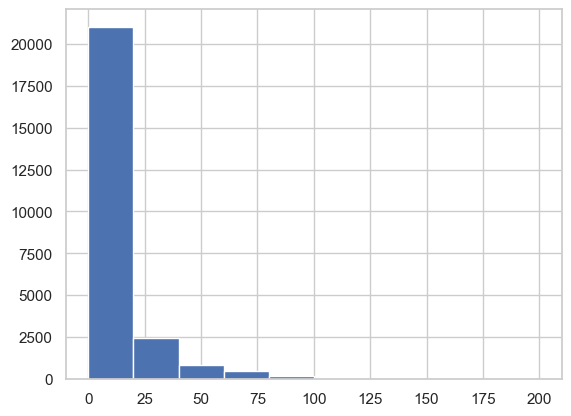

In [ ]:
#show outliers
Q1 = df['maximum_salary'].quantile(0.25)
Q3 = df['maximum_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

#Remove outliers
df = df[(df['maximum_salary'] >= lower_bound) & (df['maximum_salary'] <= upper_bound)]
df
df['maximum_salary'].hist(bins=10)
plt.show()

# **Null Values**

In [ ]:
df.isnull().sum()

company_name                                   1
company_page_listed                            0
company_employee_count                         0
company_follower_count                         0
job_title                                      0
job_description                                2
is_post_a_supervisor_position_calculated       0
maximum_salary                                 0
median_salary                                  0
minimum_salary                                 0
pay_period                                     0
pay_listed_calculated                          0
work_type                                      0
job_location                                   0
job_state_code_calculated                      0
is_job_remote_calculated                       0
number_of_posting_views                        0
application_type                               0
is_application_offsite_calculated              0
experience_level                               0
posting_domain      

# **Dropped columns**

In [ ]:
df.shape

(25018, 29)

In [ ]:
#dropped columns

dropped =['company_name','job_title',
         'job_description','median_salary',
         'job_location','Categorized_Job_Title',
         'Categorized_job_Title','Recategorized_Job_Title']
df.drop(columns=dropped,inplace=True,errors='ignore')
df.shape

(25018, 21)

# **Categorize Data**

In [ ]:
df.iloc[:, 10:]

,is_job_remote_calculated,number_of_posting_views,application_type,is_application_offsite_calculated,experience_level,posting_domain,has_posting_domain_calculated,is_sponsored,has_base_compensation,Grouped_Category,job_location_Categorized
1,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0,Sales,Unknown
2,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0,Engineering,Unknown
3,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1,Other,ca
5,1,16,OffsiteApply,True,Mid-Senior level,www.zoll.com,True,0,0,Management,united states
7,1,29,OffsiteApply,True,Director,boards.greenhouse.io,True,1,0,Management,ca
...,...,...,...,...,...,...,...,...,...,...,...
33239,0,10,OffsiteApply,True,Entry level,nenniandassociates.catsone.com,True,0,0,Management,Unknown
33240,0,0,OffsiteApply,True,Mid-Senior level,careers.ugicorp.com,True,0,0,Other,ca
33242,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,1,0,Technical,il
33244,0,0,OffsiteApply,True,Mid-Senior level,jobs.andersgroup.org,True,0,0,Healthcare,united states


In [ ]:
#columns overview
df.iloc[:, :10]

,company_page_listed,company_employee_count,company_follower_count,is_post_a_supervisor_position_calculated,maximum_salary,minimum_salary,pay_period,pay_listed_calculated,work_type,job_state_code_calculated
1,True,300,2923,False,0,0.00,Not Listed,False,Full-time,WI
2,True,314,8487,True,0,0.00,Not Listed,False,Full-time,AL
3,True,36,305,False,22,22.27,HOURLY,True,Full-time,CA
5,True,5308,101161,True,0,0.00,Not Listed,False,Full-time,XF
7,True,859,71463,True,0,0.00,Not Listed,False,Full-time,CA
...,...,...,...,...,...,...,...,...,...,...
33239,True,27,3159,False,0,0.00,Not Listed,False,Full-time,NC
33240,True,2838,18507,False,0,0.00,Not Listed,False,Full-time,CA
33242,True,170,6051,False,0,0.00,Not Listed,False,Full-time,SC
33244,True,170,6051,False,0,0.00,Not Listed,False,Full-time,XF


In [ ]:
ordinal_df = df[['pay_period','experience_level']]
ordinal_df.head()
ordinal_df['experience_level'].value_counts()


experience_level
Mid-Senior level    7873
Not Listed          6963
Entry level         6791
Associate           2029
Director             808
Internship           367
Executive            187
Name: count, dtype: int64

In [ ]:
cat_df = df[['work_type',
             'job_state_code_calculated',
             'application_type',
             'posting_domain',
             'Grouped_Category',
             'job_location_Categorized']]

cat_df.head()

,work_type,job_state_code_calculated,application_type,posting_domain,Grouped_Category,job_location_Categorized
1,Full-time,WI,OffsiteApply,www.click2apply.net,Sales,Unknown
2,Full-time,AL,OffsiteApply,www.click2apply.net,Engineering,Unknown
3,Full-time,CA,OffsiteApply,jobs.apploi.com,Other,ca
5,Full-time,XF,OffsiteApply,www.zoll.com,Management,united states
7,Full-time,CA,OffsiteApply,boards.greenhouse.io,Management,ca


In [ ]:
bool_df = df[['company_page_listed',
              'is_post_a_supervisor_position_calculated',
              'pay_listed_calculated',
              'is_application_offsite_calculated',
              'has_posting_domain_calculated']]

bool_df = bool_df.astype(int)
bool_df.head()

,company_page_listed,is_post_a_supervisor_position_calculated,pay_listed_calculated,is_application_offsite_calculated,has_posting_domain_calculated
1,1,0,0,1,1
2,1,1,0,1,1
3,1,0,1,1,1
5,1,1,0,1,1
7,1,1,0,1,1


In [ ]:
num_df = df[['company_employee_count',
             'company_follower_count',
             'minimum_salary',
             'number_of_posting_views']]
num_df = num_df.astype(int)
num_df.head()

,company_employee_count,company_follower_count,minimum_salary,number_of_posting_views
1,300,2923,0,0
2,314,8487,0,0
3,36,305,22,1
5,5308,101161,0,16
7,859,71463,0,29


In [ ]:
print(df.shape)
print(f'{len(num_df.columns)}\n{len(bool_df.columns)}\n{len(ordinal_df.columns)}\n{len(cat_df.columns)}')

(25018, 21)
4
5
2
6


# **Train Test Split**

In [ ]:
X = df.drop(columns='maximum_salary')
y = df['maximum_salary']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'y_test shape = {y_test.shape}')

x_train shape = (20014, 20)
x_test shape = (5004, 20)
y_train shape = (20014,)
y_test shape = (5004,)


In [ ]:
x_train.head()

,company_page_listed,company_employee_count,company_follower_count,is_post_a_supervisor_position_calculated,minimum_salary,pay_period,pay_listed_calculated,work_type,job_state_code_calculated,is_job_remote_calculated,number_of_posting_views,application_type,is_application_offsite_calculated,experience_level,posting_domain,has_posting_domain_calculated,is_sponsored,has_base_compensation,Grouped_Category,job_location_Categorized
774,True,250,253587,False,50.0,HOURLY,True,Contract,XF,0,15,ComplexOnsiteApply,False,Mid-Senior level,NaN,False,1,1,Engineering,Unknown
13901,True,2025,231325,False,0.0,Not Listed,False,Full-time,CA,0,20,ComplexOnsiteApply,True,Entry level,phf.tbe.taleo.net,True,0,0,Specialist,ca
21517,True,1092,70614,False,19.0,HOURLY,True,Contract,GA,0,0,ComplexOnsiteApply,True,Entry level,jsv3.recruitics.com,True,0,1,Specialist,Unknown
19523,True,17957,138185,True,0.0,Not Listed,False,Full-time,PA,0,0,OffsiteApply,True,Mid-Senior level,jobs.exeloncorp.com,True,0,0,Management,il
3485,True,10095,3374336,True,0.0,Not Listed,False,Full-time,NY,0,82,OffsiteApply,True,Mid-Senior level,www.aplitrak.com,True,0,0,Management,new york


In [ ]:
y_train.head()

774      70
13901     0
21517    21
19523     0
3485      0
Name: maximum_salary, dtype: int64

In [ ]:
#categories for ordinal encoder
categories =[['Not Listed','Unpaid','ONCE','HOURLY','MONTHLY','YEARLY'],
             ['Internship','Entry level','Associate','Mid-Senior level','Director','Executive','Not Listed']]

### **FUNCTION FOR EVALUATE**

In [ ]:
def evaluate_regression_model(y_test, y_pred):
    """
    Evaluate a regression model by calculating key performance metrics 
    and plotting Actual vs Predicted values.
    
    Parameters:
    -----------
    y_test : array-like
        True (actual) target values.
    y_pred : array-like
        Predicted target values from the model.
    
    Returns:
    --------
    metrics : dict
        Dictionary containing MAE, MSE, RMSE, and R² score.
    """

    # ---- Metrics ----
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # ---- Print results ----
    print("Model Evaluation Metrics:")
    print(f"MAE  (Mean Absolute Error): {mae:.4f}")
    print(f"MSE  (Mean Squared Error): {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("="*40)

    # ---- Scatter Plot ----
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()

    # ---- Return metrics ----
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}


# **MAIN PIPELINE**

In [ ]:
def build_pipeline_model(model, x_train, y_train):
    """
    Build and fit a pipeline with column transformations and a model.

    Parameters:
    -----------
    model : sklearn-like model
        Any regression or classification model instance.
    x_train : pd.DataFrame
        Training features.
    y_train : pd.Series or np.array
        Training target.
    num_df : pd.DataFrame
        DataFrame containing numeric columns.
    cat_df : pd.DataFrame
        DataFrame containing categorical columns.
    ordinal_df : pd.DataFrame
        DataFrame containing ordinal columns.
    categories : list of lists
        List of categories for each ordinal column, in the correct order.

    Returns:
    --------
    pipe : sklearn.pipeline.Pipeline
        Fitted pipeline.
    """
    
    column = ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_df.columns),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), cat_df.columns),

        ('ordinal', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder(categories=categories))
        ]), ordinal_df.columns)
    ], remainder='passthrough')

    pipe = Pipeline(steps=[
        ('preprocess', column),
        ('model', model)
    ])

    pipe.fit(x_train, y_train)
    y_predicted = pipe.predict(x_test)
    evaluate_regression_model(y_test, y_predicted)
    return pipe,y_predicted


# **Linear Regression**

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 1.1266
MSE  (Mean Squared Error): 7.4773
RMSE (Root Mean Squared Error): 2.7345
R² Score: 0.9740


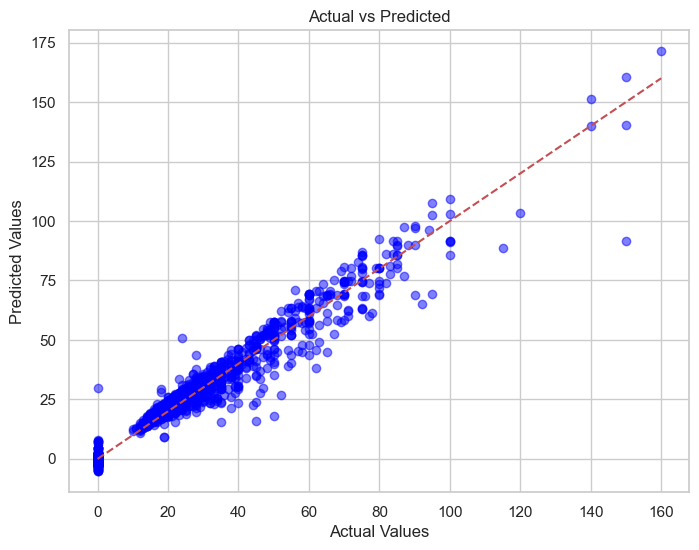

In [ ]:
pipe, y_predicted =  build_pipeline_model(LinearRegression(),x_train,y_train)

# **Ridge Regression**

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 1.1071
MSE  (Mean Squared Error): 7.1574
RMSE (Root Mean Squared Error): 2.6753
R² Score: 0.9751


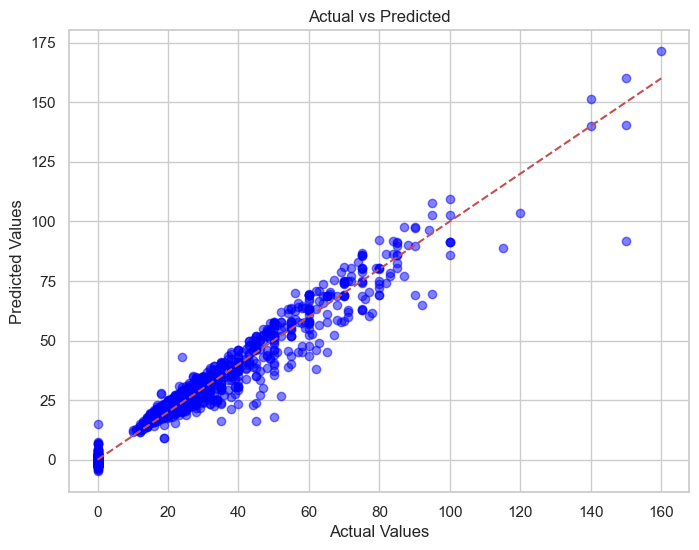

In [ ]:
from sklearn.linear_model import Ridge
pipe, y_predicted =  build_pipeline_model(Ridge(alpha=1),x_train,y_train)

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
pipe, y_predicted =  build_pipeline_model(Lasso(alpha=0.01),x_train,y_train)

# **Decision Tree**

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 0.8724
MSE  (Mean Squared Error): 13.0350
RMSE (Root Mean Squared Error): 3.6104
R² Score: 0.9547


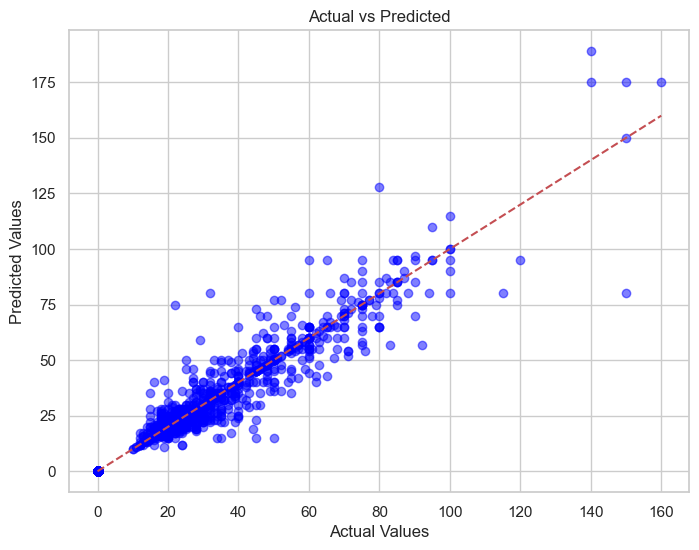

In [ ]:
from sklearn.tree import DecisionTreeRegressor
pipe, y_predicted =  build_pipeline_model(DecisionTreeRegressor(),x_train,y_train)

# **SVR**

In [ ]:
from sklearn.svm import SVR
pipe, y_predicted =  build_pipeline_model(SVR(),x_train,y_train)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipe, y_predicted =  build_pipeline_model(RandomForestRegressor(),x_train,y_train)

# **AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
pipe, y_predicted =  build_pipeline_model(AdaBoostRegressor(),x_train,y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
pipe, y_predicted =  build_pipeline_model(KNeighborsRegressor(),x_train,y_train)

# **MODEL TUNING**

#### **DecisionTreeRegressor**

In [ ]:
#Param Grid
param_grid ={
    'max_depth' : [5,7,10],
    'min_samples_split' : [1,2,5],
    'splitter' : ['best', 'random']
}
gs = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param_grid,cv=5)

pipe, y_predicted =  build_pipeline_model(gs,x_train,y_train)

#### **After all we find that the best model is RANDOMFOREST WITH R² Score: 0.9764**
**===================================================================================**

# **TARGET_VARIABLE : CHECK SPONSERSHIP**

### **Data Preproccesing**

In [ ]:
df.columns

Index(['company_page_listed', 'company_employee_count',
       'company_follower_count', 'is_post_a_supervisor_position_calculated',
       'maximum_salary', 'minimum_salary', 'pay_period',
       'pay_listed_calculated', 'work_type', 'job_state_code_calculated',
       'is_job_remote_calculated', 'number_of_posting_views',
       'application_type', 'is_application_offsite_calculated',
       'experience_level', 'posting_domain', 'has_posting_domain_calculated',
       'is_sponsored', 'has_base_compensation', 'Grouped_Category',
       'job_location_Categorized'],
      dtype='object')

In [ ]:
df_bool.columns

Index(['company_page_listed', 'is_post_a_supervisor_position_calculated',
       'pay_listed_calculated', 'is_application_offsite_calculated',
       'has_posting_domain_calculated'],
      dtype='object')

In [ ]:
#converting data into num
scaler = StandardScaler()
df[df_bool.columns] = df[df_bool.columns].astype('int')
df[df_bool.columns] =scaler.fit_transform(df[df_bool.columns])
df[df_bool.columns]

,company_page_listed,is_post_a_supervisor_position_calculated,pay_listed_calculated,is_application_offsite_calculated,has_posting_domain_calculated
1,0.150484,-0.610269,-0.520559,0.778714,0.790349
2,0.150484,1.638621,-0.520559,0.778714,0.790349
3,0.150484,-0.610269,1.921012,0.778714,0.790349
5,0.150484,1.638621,-0.520559,0.778714,0.790349
7,0.150484,1.638621,-0.520559,0.778714,0.790349
...,...,...,...,...,...
33239,0.150484,-0.610269,-0.520559,0.778714,0.790349
33240,0.150484,-0.610269,-0.520559,0.778714,0.790349
33242,0.150484,-0.610269,-0.520559,0.778714,0.790349
33244,0.150484,-0.610269,-0.520559,0.778714,0.790349


In [ ]:
first_list =[]
search_list =[]
for i in cat_df.columns :  
     var = cat_df[i].value_counts().head(10).index.tolist()
     first_list.append(var)

for i in first_list:
    for j in i:
        search_list.append(j.lower().strip())
    
search_list    

['full-time',
 'contract',
 'part-time',
 'temporary',
 'internship',
 'other',
 'volunteer',
 'xf',
 'tx',
 'ca',
 'fl',
 'il',
 'ny',
 'pa',
 'nc',
 'ma',
 'ga',
 'offsiteapply',
 'complexonsiteapply',
 'simpleonsiteapply',
 'www.click2apply.net',
 'click.appcast.io',
 'jobs.smartrecruiters.com',
 'recruiting.ultipro.com',
 'boards.greenhouse.io',
 'careers.hcahealthcare.com',
 'www.ayahealthcare.com',
 'jsv3.recruitics.com',
 'recruiting2.ultipro.com',
 'sjobs.brassring.com',
 'management',
 'other',
 'technical',
 'engineering',
 'sales',
 'healthcare',
 'specialist',
 'analyst',
 'assistant',
 'creative',
 'unknown',
 'ca',
 'united states',
 'il',
 'tx',
 'fl',
 'ny',
 'new york',
 'chicago',
 'houston']

In [ ]:
#clean categorical columns to have only top10 freq values
def top_n_keep(col, n=10):
    top_values = col.value_counts().nlargest(n).index
    return col.apply(lambda x: x if x in top_values else 'others')


df_cleaned = df.apply(lambda col: top_n_keep(col, n=10))

df_cleaned

,company_page_listed,company_employee_count,company_follower_count,is_post_a_supervisor_position_calculated,maximum_salary,minimum_salary,pay_period,pay_listed_calculated,work_type,job_state_code_calculated,...,number_of_posting_views,application_type,is_application_offsite_calculated,experience_level,posting_domain,has_posting_domain_calculated,is_sponsored,has_base_compensation,Grouped_Category,job_location_Categorized
1,0.150484,others,others,-0.610269,0,0.0,Not Listed,-0.520559,Full-time,others,...,0,OffsiteApply,0.778714,Not Listed,www.click2apply.net,0.790349,0,0,Sales,Unknown
2,0.150484,others,others,1.638621,0,0.0,Not Listed,-0.520559,Full-time,others,...,0,OffsiteApply,0.778714,Not Listed,www.click2apply.net,0.790349,0,0,Engineering,Unknown
3,0.150484,others,others,-0.610269,22,others,HOURLY,1.921012,Full-time,CA,...,1,OffsiteApply,0.778714,Entry level,others,0.790349,0,1,Other,ca
5,0.150484,others,others,1.638621,0,0.0,Not Listed,-0.520559,Full-time,XF,...,others,OffsiteApply,0.778714,Mid-Senior level,others,0.790349,0,0,Management,united states
7,0.150484,others,others,1.638621,0,0.0,Not Listed,-0.520559,Full-time,CA,...,others,OffsiteApply,0.778714,Director,boards.greenhouse.io,0.790349,1,0,Management,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33239,0.150484,others,others,-0.610269,0,0.0,Not Listed,-0.520559,Full-time,NC,...,others,OffsiteApply,0.778714,Entry level,others,0.790349,0,0,Management,Unknown
33240,0.150484,others,others,-0.610269,0,0.0,Not Listed,-0.520559,Full-time,CA,...,0,OffsiteApply,0.778714,Mid-Senior level,others,0.790349,0,0,Other,ca
33242,0.150484,others,others,-0.610269,0,0.0,Not Listed,-0.520559,Full-time,others,...,0,OffsiteApply,0.778714,Mid-Senior level,others,0.790349,1,0,Technical,il
33244,0.150484,others,others,-0.610269,0,0.0,Not Listed,-0.520559,Full-time,XF,...,0,OffsiteApply,0.778714,Mid-Senior level,others,0.790349,0,0,Healthcare,united states


In [ ]:
#encoding categorical columns
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
df_cleaned = ohe.fit_transform(df_cleaned[cat_df.columns]) 

In [ ]:
#put them in the df
df5 = df.drop(columns=cat_df)
df6 = pd.concat([df5,df_cleaned],axis=1)

In [ ]:
#encode ordinal columns
ordinal = OrdinalEncoder(categories=categories).set_output(transform='pandas')
df7 = ordinal.fit_transform(df6[ordinal_df.columns])
df6 = pd.concat([df7,df6.drop(columns=df7.columns)],axis=1)

### **Check Target Balance**

In [ ]:
df6['is_sponsored'].value_counts()

is_sponsored
0    19203
1     5815
Name: count, dtype: int64

# **Train Test Split**

In [ ]:
#fill nall values 
impute = SimpleImputer(strategy='most_frequent')
df6 = pd.DataFrame(impute.fit_transform(df6), columns=df6.columns)

In [ ]:
#convert to int's
df6 = df6.apply(pd.to_numeric, errors='ignore')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22488\2583869281.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df6 = df6.apply(pd.to_numeric, errors='ignore')


In [ ]:
df6 = df6.apply(pd.to_numeric, errors='ignore')

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22488\1624503028.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df6 = df6.apply(pd.to_numeric, errors='ignore')


In [ ]:
X = df6.drop(columns='is_sponsored')
y = df6['is_sponsored']

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'y_test shape = {y_test.shape}')

x_train shape = (20014, 68)
x_test shape = (5004, 68)
y_train shape = (20014,)
y_test shape = (5004,)


### **OverSampling** 

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_balance,y_train_balance =smote.fit_resample(x_train,y_train)

In [ ]:
print(pd.Series(y_train_balance).value_counts())

is_sponsored
1.0    15349
0.0    15349
Name: count, dtype: int64


# **MODEL FITTING AND PREDICTION**

### **Function to fit & Evaluate model**

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

def build_model(pipe, x_train, y_train, x_test, y_test):
    """
    Trains and evaluates a classification model pipeline with structured output.
    """
    # Train model
    pipe.fit(x_train, y_train)
    
    # Predictions
    y_pred = pipe.predict(x_test)
    
    # Core metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification report
    report = classification_report(y_test, y_pred, digits=4)
    
    # Structured output
    print("✅ Model Evaluation:")
    print(f"{'-'*40}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"{'-'*40}\n")
    
    print("Confusion Matrix:")
    print(cm)
    print(f"\n{'-'*40}\n")
    
    print("Classification Report:")
    print(report)
    
    return pipe, y_pred


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
pipe, y_predicted = build_model(LogisticRegression(), x_train_balance, y_train_balance, x_test, y_test)


✅ Model Evaluation:
----------------------------------------
Accuracy:  0.5400
Precision: 0.2746
Recall:    0.6104
F1 Score:  0.3788
----------------------------------------

Confusion Matrix:
[[2000 1854]
 [ 448  702]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8170    0.5189    0.6347      3854
         1.0     0.2746    0.6104    0.3788      1150

    accuracy                         0.5400      5004
   macro avg     0.5458    0.5647    0.5068      5004
weighted avg     0.6924    0.5400    0.5759      5004



C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **SVM**

In [ ]:
from sklearn.svm import SVC
pipe, y_predicted = build_model(SVC(), x_train_balance, y_train_balance, x_test, y_test)


✅ Model Evaluation:
----------------------------------------
Accuracy:  0.3120
Precision: 0.2292
Recall:    0.8435
F1 Score:  0.3604
----------------------------------------

Confusion Matrix:
[[ 591 3263]
 [ 180  970]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7665    0.1533    0.2556      3854
         1.0     0.2292    0.8435    0.3604      1150

    accuracy                         0.3120      5004
   macro avg     0.4978    0.4984    0.3080      5004
weighted avg     0.6430    0.3120    0.2797      5004



## **naive_bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipe, y_predicted = build_model(GaussianNB(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7430
Precision: 0.1667
Recall:    0.0296
F1 Score:  0.0502
----------------------------------------

Confusion Matrix:
[[3684  170]
 [1116   34]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7675    0.9559    0.8514      3854
         1.0     0.1667    0.0296    0.0502      1150

    accuracy                         0.7430      5004
   macro avg     0.4671    0.4927    0.4508      5004
weighted avg     0.6294    0.7430    0.6673      5004



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
pipe, y_predicted = build_model(KNeighborsClassifier(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.6509
Precision: 0.3262
Recall:    0.4870
F1 Score:  0.3907
----------------------------------------

Confusion Matrix:
[[2697 1157]
 [ 590  560]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8205    0.6998    0.7554      3854
         1.0     0.3262    0.4870    0.3907      1150

    accuracy                         0.6509      5004
   macro avg     0.5733    0.5934    0.5730      5004
weighted avg     0.7069    0.6509    0.6715      5004



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pipe, y_predicted = build_model(DecisionTreeClassifier(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.6962
Precision: 0.3481
Recall:    0.3687
F1 Score:  0.3581
----------------------------------------

Confusion Matrix:
[[3060  794]
 [ 726  424]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8082    0.7940    0.8010      3854
         1.0     0.3481    0.3687    0.3581      1150

    accuracy                         0.6962      5004
   macro avg     0.5782    0.5813    0.5796      5004
weighted avg     0.7025    0.6962    0.6993      5004



## **=================Ensemble===============**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipe, y_predicted = build_model(RandomForestClassifier(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7662
Precision: 0.4810
Recall:    0.2200
F1 Score:  0.3019
----------------------------------------

Confusion Matrix:
[[3581  273]
 [ 897  253]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7997    0.9292    0.8596      3854
         1.0     0.4810    0.2200    0.3019      1150

    accuracy                         0.7662      5004
   macro avg     0.6403    0.5746    0.5807      5004
weighted avg     0.7264    0.7662    0.7314      5004



## **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
pipe, y_predicted = build_model(AdaBoostClassifier(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7414
Precision: 0.4032
Recall:    0.2609
F1 Score:  0.3168
----------------------------------------

Confusion Matrix:
[[3410  444]
 [ 850  300]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8005    0.8848    0.8405      3854
         1.0     0.4032    0.2609    0.3168      1150

    accuracy                         0.7414      5004
   macro avg     0.6018    0.5728    0.5787      5004
weighted avg     0.7092    0.7414    0.7202      5004



## **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe, y_predicted = build_model(GradientBoostingClassifier(), x_train_balance, y_train_balance, x_test, y_test)

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7782
Precision: 0.5833
Recall:    0.1217
F1 Score:  0.2014
----------------------------------------

Confusion Matrix:
[[3754  100]
 [1010  140]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7880    0.9741    0.8712      3854
         1.0     0.5833    0.1217    0.2014      1150

    accuracy                         0.7782      5004
   macro avg     0.6857    0.5479    0.5363      5004
weighted avg     0.7410    0.7782    0.7173      5004



# *===========================================================================*
## **For now top 3 models are**
### **1- GradientBoostingClassifier**
### **2- RandomForestClassifier**
### **3- AdaBoostClassifier**
**so now we will start hyperparameter Tuning and merging models together to imporve preformence**
# *===========================================================================*

### **Model Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
def tune_and_build_model(pipe, param_grid, x_train, y_train, x_test, y_test):
    """
    Tunes, trains, and evaluates a classification model pipeline with structured output.
    
    Parameters:
    -----------
    pipe : sklearn.pipeline.Pipeline
        The model pipeline (e.g., with scaler, pca, model).
    param_grid : dict
        Dictionary of parameters for GridSearchCV.
    x_train, y_train, x_test, y_test : array-like
        Training and testing data.

    Returns:
    --------
    best_model : trained model
        The best model found after tuning and training.
    best_params : dict
        Best parameters from grid search.
    y_pred : ndarray
        Model predictions on the test set.
    """

    # 🔧 Grid Search for best parameters
    print("🚀 Starting Hyperparameter Tuning...\n")
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("\n✅ Best Parameters Found:")
    print(best_params)
    print("-" * 50)

    # 🧠 Train model with best parameters
    best_model.fit(x_train, y_train)
    y_pred = best_model.predict(x_test)

    # 📈 Evaluate model
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)

    # 🧾 Structured Output
    print("\n✅ Model Evaluation:")
    print(f"{'-'*40}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"{'-'*40}\n")
    
    print("Confusion Matrix:")
    print(cm)
    print(f"\n{'-'*40}\n")
    
    print("Classification Report:")
    print(report)

    return best_model, best_params, y_pred


## **Logistic Regression Tuning**

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

best_model, best_params, y_pred = tune_and_build_model( LogisticRegression(max_iter=500), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Best Parameters Found:
{'C': 0.1, 'solver': 'lbfgs'}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.5881
Precision: 0.3012
Recall:    0.6000
F1 Score:  0.4010
----------------------------------------

Confusion Matrix:
[[2253 1601]
 [ 460  690]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8304    0.5846    0.6862      3854
         1.0     0.3012    0.6000    0.4010      1150

    accuracy                         0.5881      5004
   macro avg     0.5658    0.5923    0.5436      5004
weighted avg     0.7088    0.5881    0.6206      5004



C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **SVM Tuning**

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf','sigmoid'],
    'gamma' :['scale', 'auto']
}

best_model, best_params, y_pred = tune_and_build_model( SVC(max_iter=500), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



✅ Best Parameters Found:
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
--------------------------------------------------


C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7684
Precision: 0.4430
Recall:    0.0304
F1 Score:  0.0570
----------------------------------------

Confusion Matrix:
[[3810   44]
 [1115   35]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7736    0.9886    0.8680      3854
         1.0     0.4430    0.0304    0.0570      1150

    accuracy                         0.7684      5004
   macro avg     0.6083    0.5095    0.4625      5004
weighted avg     0.6976    0.7684    0.6816      5004



## **KNN Tuning**

In [ ]:
param_grid = {
    'n_neighbors': [3,5,7,10],
    'weights': ['uniform', 'distance']
}

best_model, best_params, y_pred = tune_and_build_model( KNeighborsClassifier(), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 8 candidates, totalling 40 fits

✅ Best Parameters Found:
{'n_neighbors': 3, 'weights': 'distance'}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.6785
Precision: 0.3431
Recall:    0.4365
F1 Score:  0.3842
----------------------------------------

Confusion Matrix:
[[2893  961]
 [ 648  502]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8170    0.7506    0.7824      3854
         1.0     0.3431    0.4365    0.3842      1150

    accuracy                         0.6785      5004
   macro avg     0.5801    0.5936    0.5833      5004
weighted avg     0.7081    0.6785    0.6909      5004



## **Decision Tree Tuning**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5,10,15],
    'min_samples_split' :[2,4,6],
    

}

best_model, best_params, y_pred = tune_and_build_model( DecisionTreeClassifier(), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters Found:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7194
Precision: 0.3652
Recall:    0.2991
F1 Score:  0.3289
----------------------------------------

Confusion Matrix:
[[3256  598]
 [ 806  344]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8016    0.8448    0.8226      3854
         1.0     0.3652    0.2991    0.3289      1150

    accuracy                         0.7194      5004
   macro avg     0.5834    0.5720    0.5758      5004
weighted avg     0.7013    0.7194    0.7092      5004



## **Random Forest Tuning**

In [ ]:
param_grid = {
    'n_estimators' :[100,500,1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5,10,15],
    'min_samples_split' :[2,4,6],
    

}

best_model, best_params, y_pred = tune_and_build_model( RandomForestClassifier(), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 81 candidates, totalling 405 fits

✅ Best Parameters Found:
{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 6, 'n_estimators': 1000}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7744
Precision: 0.5467
Recall:    0.1070
F1 Score:  0.1789
----------------------------------------

Confusion Matrix:
[[3752  102]
 [1027  123]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7851    0.9735    0.8692      3854
         1.0     0.5467    0.1070    0.1789      1150

    accuracy                         0.7744      5004
   macro avg     0.6659    0.5402    0.5241      5004
weighted avg     0.7303    0.7744    0.7106      5004



## **AdaBoostClassifier Tuing**

In [ ]:
param_grid = {
    'n_estimators' :[100,500,1000],
    'learning_rate': [1,0.1,0.01],
   
    

}
model =AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth=1))

best_model, best_params, y_pred = tune_and_build_model( model, param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 9 candidates, totalling 45 fits

✅ Best Parameters Found:
{'learning_rate': 1, 'n_estimators': 1000}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7708
Precision: 0.5053
Recall:    0.1243
F1 Score:  0.1996
----------------------------------------

Confusion Matrix:
[[3714  140]
 [1007  143]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7867    0.9637    0.8662      3854
         1.0     0.5053    0.1243    0.1996      1150

    accuracy                         0.7708      5004
   macro avg     0.6460    0.5440    0.5329      5004
weighted avg     0.7220    0.7708    0.7130      5004



## **GradientBoostingClassifier Tuning**

In [ ]:
param_grid = {
    'n_estimators' :[100,500,1000],
    'learning_rate': [1,0.1,0.01],
    'criterion' :['friedman_mse', 'squared_error'],
}


best_model, best_params, y_pred = tune_and_build_model( GradientBoostingClassifier(), param_grid, x_train_balance, y_train_balance, x_test, y_test)

🚀 Starting Hyperparameter Tuning...

Fitting 5 folds for each of 18 candidates, totalling 90 fits

✅ Best Parameters Found:
{'criterion': 'squared_error', 'learning_rate': 0.1, 'n_estimators': 1000}
--------------------------------------------------

✅ Model Evaluation:
----------------------------------------
Accuracy:  0.7786
Precision: 0.5477
Recall:    0.2096
F1 Score:  0.3031
----------------------------------------

Confusion Matrix:
[[3655  199]
 [ 909  241]]

----------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8008    0.9484    0.8684      3854
         1.0     0.5477    0.2096    0.3031      1150

    accuracy                         0.7786      5004
   macro avg     0.6743    0.5790    0.5858      5004
weighted avg     0.7427    0.7786    0.7385      5004



# **PERFORMANCE SUMMARY**



Among the models predicting sponsorship, the **GradientBoostingClassifier demonstrates the highest accuracy (77.86%)** and provides a balanced performance with precision, recall, and F1-score. **The Random Forest follows closely with an accuracy of 77.44%.** **The AdaBoostClassifier scores 77.08%**  . In summary, the GradientBoostingClassifier stands out as the top choice for predicting sponsorship, offering a robust balance between precision and recall.

# **==================================================================================================**